# Modelo Boston Crimes (Jun/2015 - Jan/2020)

Modelo de predição de eventos baseado em dados abertos sobre crimes da cidade de Boston estado de Massachusetts (https://en.wikipedia.org/wiki/Boston), os dados foram acessados pelo https://www.kaggle.com/AnalyzeBoston/crimes-in-boston . 

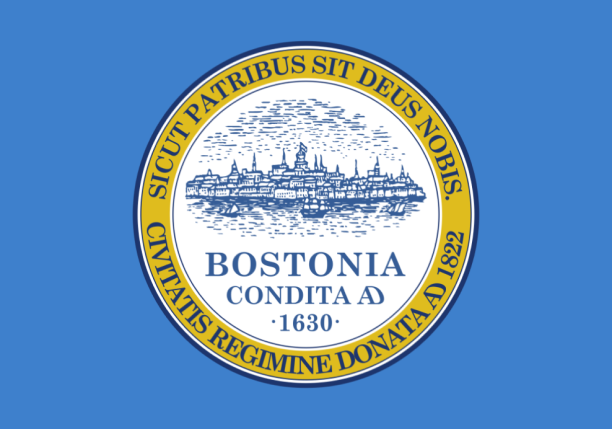

In [2]:
from IPython.display import Image
Image("1920px-Flag_of_Boston.svg.png")

Mas os dados mais atualizados podem ser acessados pelo site https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system.

Os modelo necessita de features de Dia e Noite, esta feature represente qual a hora do amanhece, e do anoitecer durate um ano em Boston,MA. Os dasdos podem ser acessados pela url https://www.timeanddate.com/sun/usa/boston .


Dados Climáticos fornecidos pela NOAA (National Oceanic and Atmospheric Administration). A NOAA é um órgão para assuntos sobre meteorologia, oceanos, atmosfera e clima, advertindo sobre perigos no tempo e mares, guia o uso e a proteção do oceano e de recursos litorâneos, e conduzem pesquisas para melhorar a compreensão do meio ambiente (https://pt.wikipedia.org/wiki/Administra%C3%A7%C3%A3o_Oce%C3%A2nica_e_Atmosf%C3%A9rica_Nacional). Os dados podem acessados pela url https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table neste site é possível enviar a localidade ou zip code (https://en.wikipedia.org/wiki/ZIP_Code). Os dados podem ser procurados usando a ferramenta https://www.ncdc.noaa.gov/cdo-web/search da NOAA.

Alguns trechos e exemplos fora extraídos dos seguintes netobooks
Exemplos

|Nome|Link|
|-----------------|-----------------------------------------------------------------------------|
|Oleksandr Kosovan|https://www.kaggle.com/kosovanolexandr/crimes-in-boston-multiclass-clustering|
|rgriffin|https://www.kaggle.com/heesoo37/boston-crimes-starter-eda|
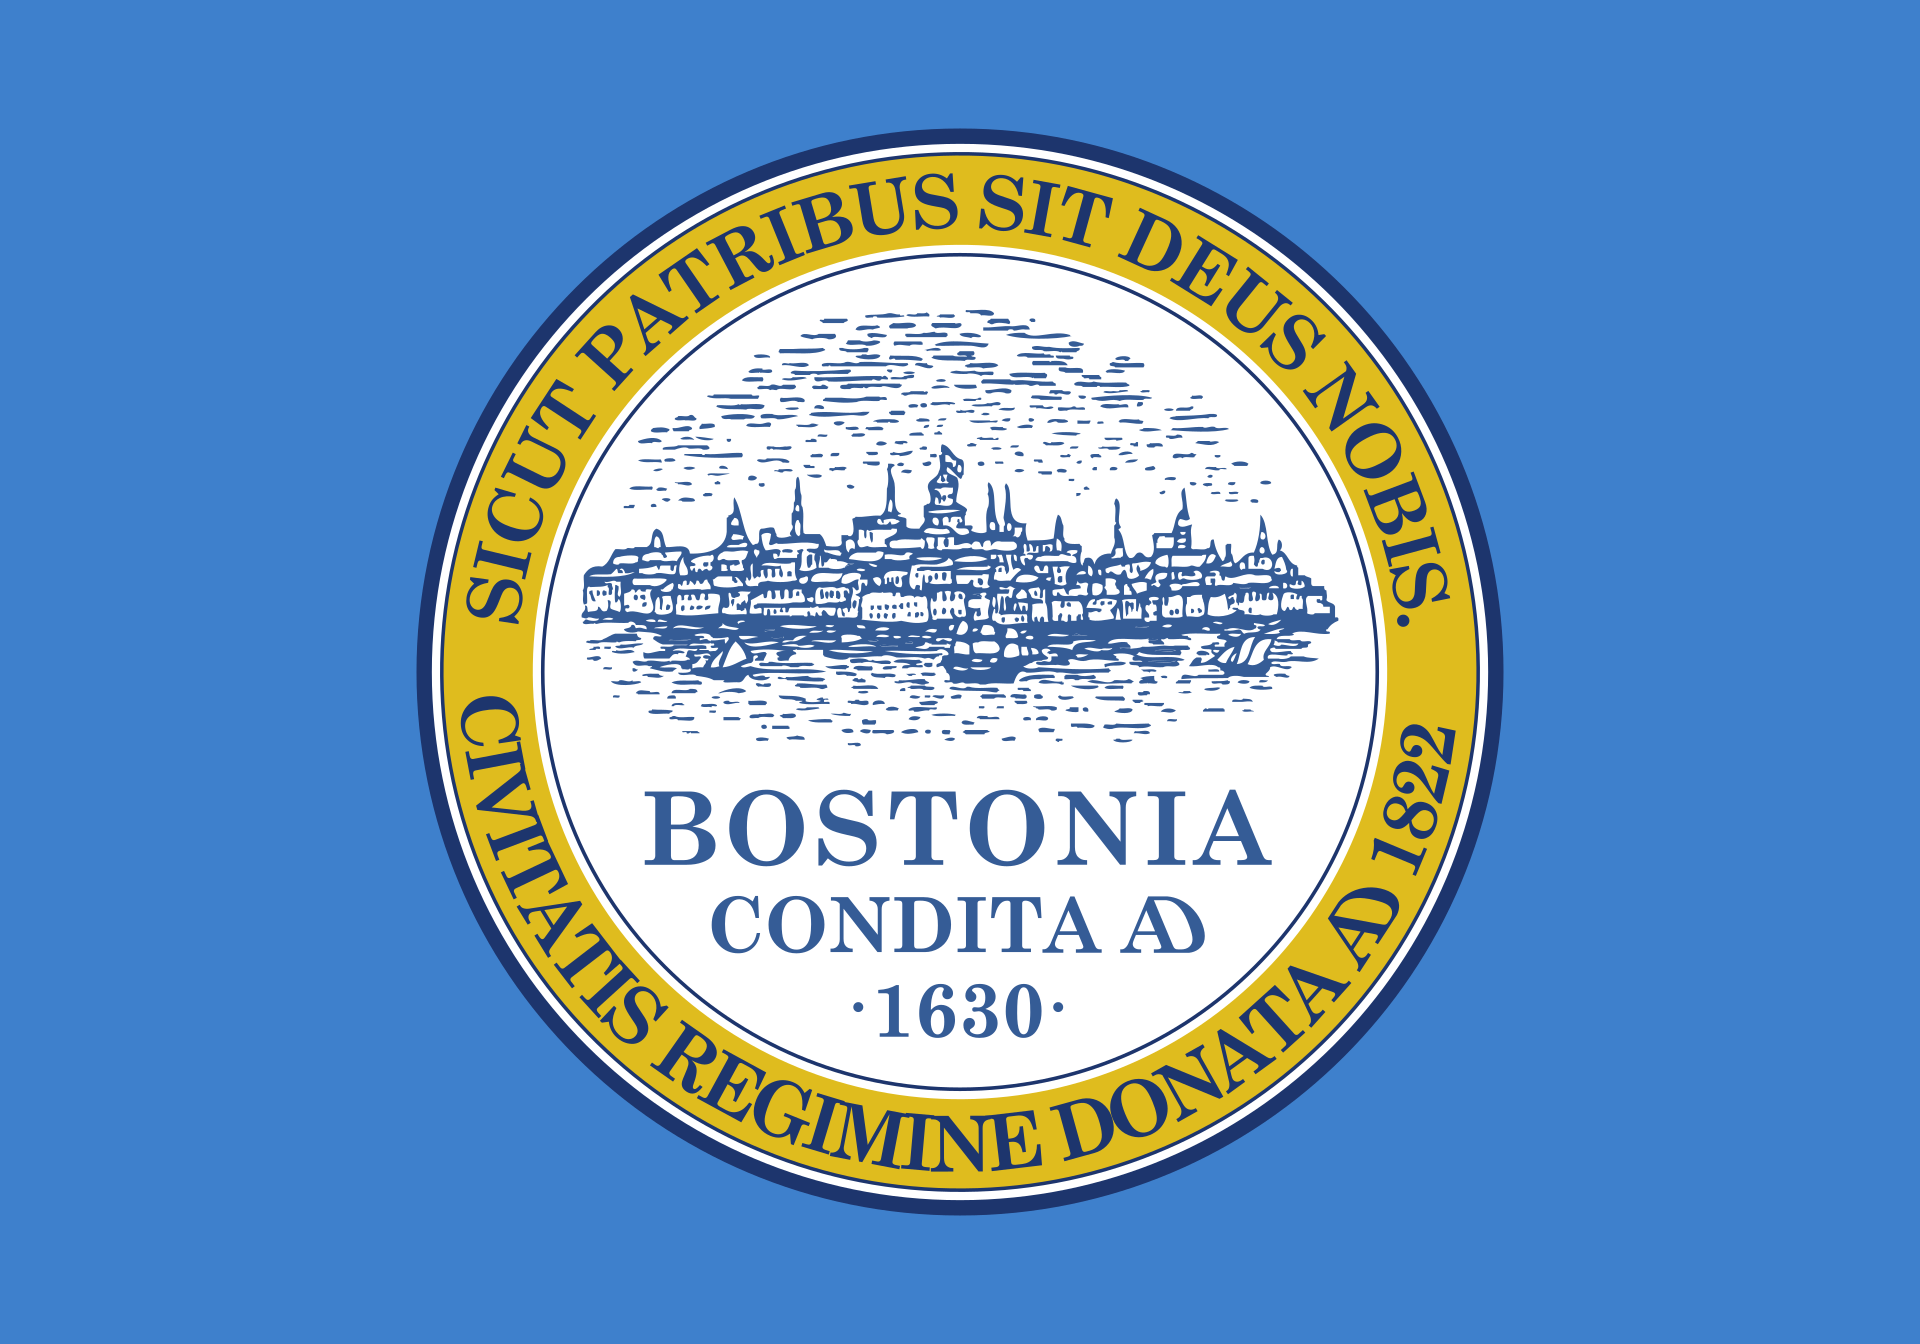

In [1]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from workalendar.usa import UnitedStates
from datetime import datetime




In [4]:
from fastprogress.fastprogress import master_bar, progress_bar
from time import sleep


#crimes = pd.read_parquet('crime.parquet')

%time crime_code = pd.read_csv('crime.csv')
%time offense_codes = pd.read_csv('offense_codes.csv', encoding = "ISO-8859-1")
%time boston_noaa = pd.read_csv('2012098.csv', encoding = "ISO-8859-1")


Wall time: 1.38 s
Wall time: 3 ms
Wall time: 6 ms


In [ ]:
crime_code.info()

### Data wrangling/Data munging

1. Split do campo de timestamp do dataset de crimes para utilização posterior e transformação em Hash para utilização em merges.

In [5]:
new = crime_code["OCCURRED_ON_DATE"].str.split(" ", n = 1, expand = True) 
crime_code["DdMmYy"]= new[0] 
crime_code["HsMnSg"]= new[1]

# hash
crime_code['hash'] = crime_code['DdMmYy'].apply(hash)

# Drop das colunas temporarias usadas
crime_code.drop(columns =["DdMmYy","HsMnSg"], inplace = True) 


2. Conversão campo OCCURRED_ON_DATE de string para timestamp

In [7]:
crime_code['OCCURRED_ON_DATE'] = pd.to_datetime(crime_code['OCCURRED_ON_DATE'])

3. Criação de campo com hash da data para marge com os dados de crimes e ocorrências

In [8]:
boston_noaa.drop(columns =["STATION","NAME"], inplace = True) 
# hash
boston_noaa['hash'] = boston_noaa['DATE'].apply(hash)


4. Cruzamento dos de ocorrência com códigos e descrições

In [ ]:
#crimes['CODE'] = crimes['OFFENSE_CODE']

#crime_code = pd.merge(crimes, offense_codes, on="CODE", how="right")

#crime_code.drop(columns =["OFFENSE_CODE"], inplace = True) 

### Data Analysis

Qual é o local da cidade com maior quantidade de ocorrências. Pode ser rua, avenida ou outro tipo.

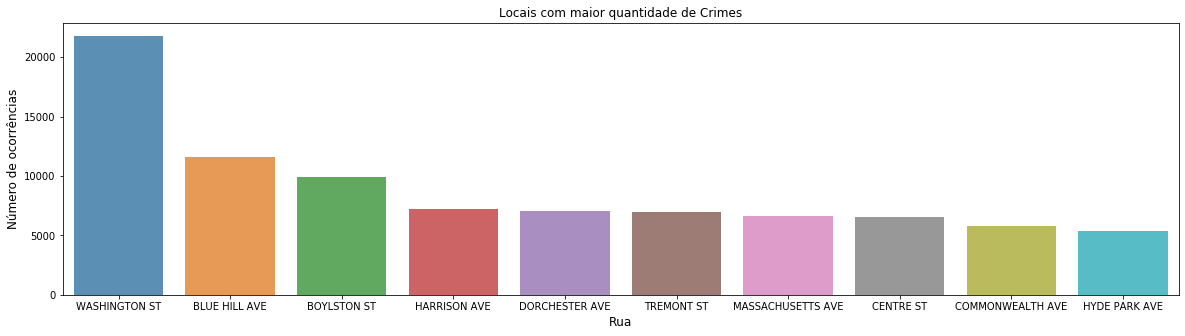

Wall time: 748 ms


In [9]:
crime_count  = crime_code['STREET'].value_counts()
crime_count = crime_count[:10,]
plt.figure(figsize=(20,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Locais com maior quantidade de Crimes')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Rua', fontsize=12)
%time plt.show()

Qual é o tipo de ocorrência mais comum na cidade de Boston.

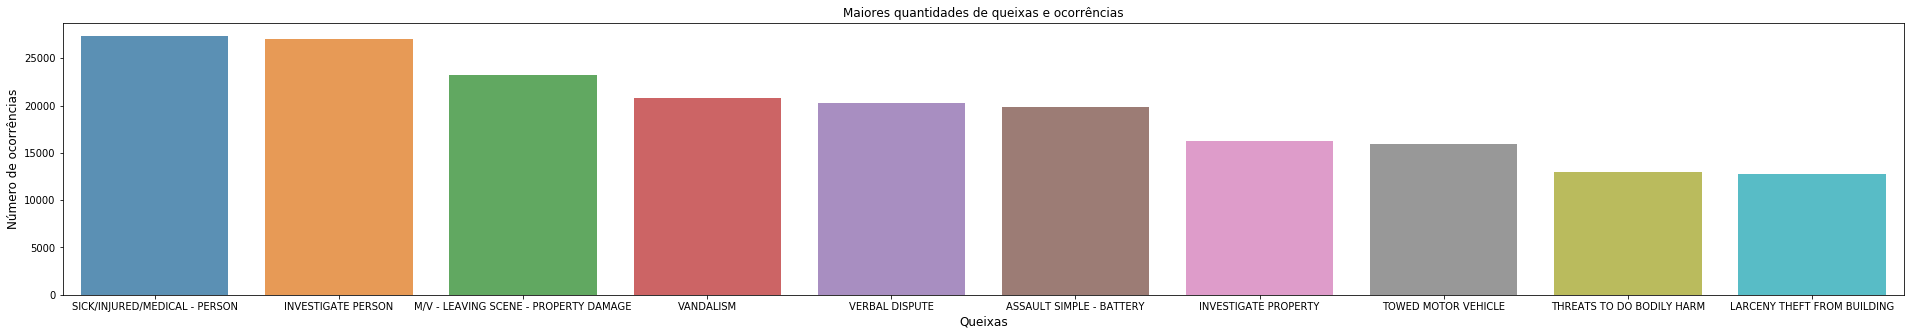

In [10]:
crime_count  = crime_code['OFFENSE_DESCRIPTION'].value_counts()
crime_count = crime_count[:10,]
plt.figure(figsize=(33,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Maiores quantidades de queixas e ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Queixas', fontsize=12)
plt.show()

Qual o horário com maior quantidade ocorrências em todos o período.

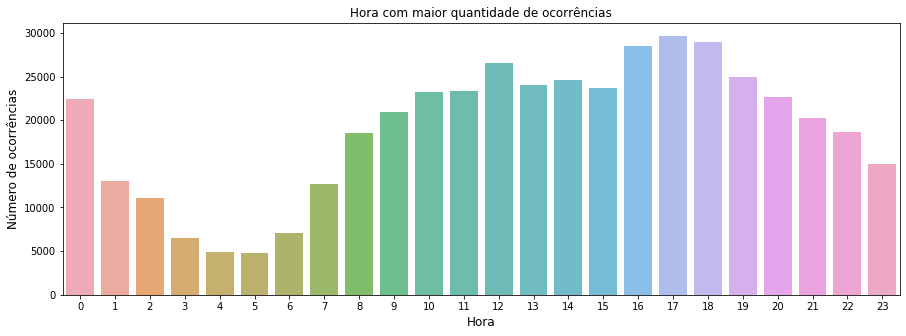

In [11]:
crime_count  = crime_code['HOUR'].value_counts()
crime_count = crime_count[:24,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Hora com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.show()

Qual o dia da semana com a maior quantidade de ocorrências, lembrado que considero um período de 5 anos.

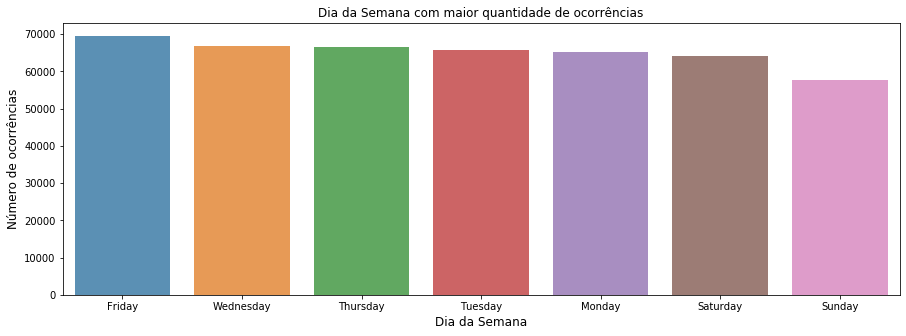

In [12]:
crime_count  = crime_code['DAY_OF_WEEK'].value_counts()
crime_count = crime_count[:7,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Dia da Semana com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Dia da Semana', fontsize=12)
plt.show()

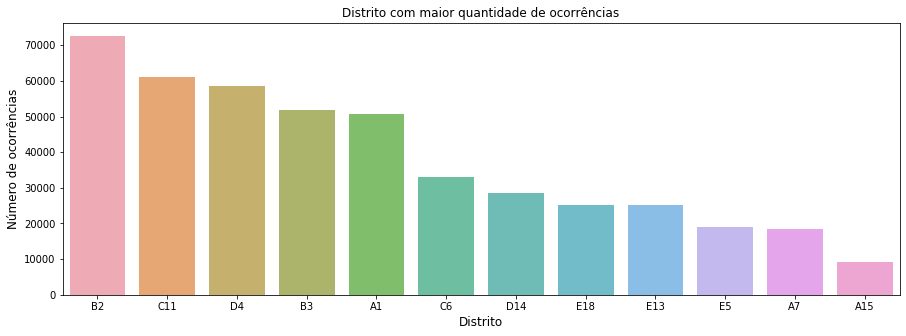

In [13]:
crime_count  = crime_code['DISTRICT'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Distrito com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Distrito', fontsize=12)
plt.show()

Qual o mês com maiores ocorrências?

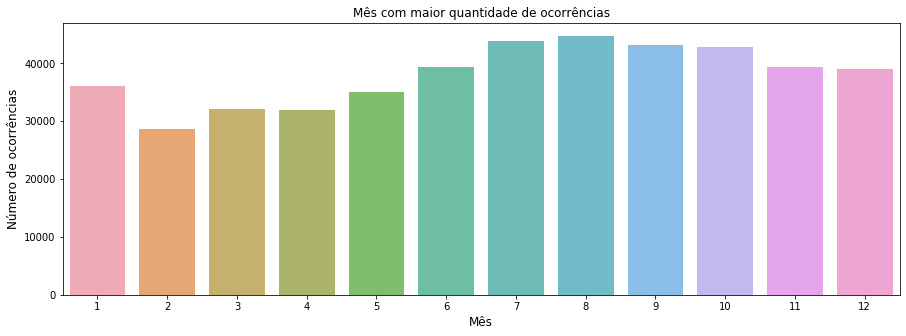

In [14]:
crime_count  = crime_code['MONTH'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Mês com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Mês', fontsize=12)
plt.show()

No gráfico acima notamos que entre os meses de junho e outubro temos uma maior quantidade de ocorrências. Interessante observar que o meses com menores quantidades ocorrências são o meses de inverno e mais chuvosos.

O Gráfico abaixo temos dados precipitação captados na cidade de Boston. São taxas médias de precipitação capturadas em 5 anos.

In [15]:
boston_noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 7 columns):
DATE    1682 non-null object
PRCP    1682 non-null float64
SNWD    1 non-null float64
TAVG    1682 non-null int64
TMAX    1682 non-null int64
TMIN    1682 non-null int64
hash    1682 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 92.1+ KB


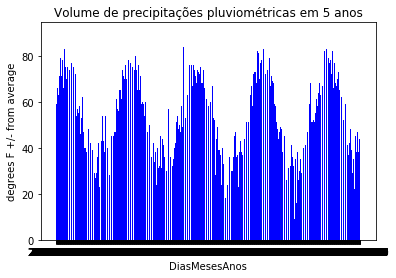

The slowest run took 7.14 times longer than the fastest. This could mean that an intermediate result is being cached.
5.9 µs ± 6.08 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
plt.title("Volume de precipitações pluviométricas em 5 anos")
plt.xlabel("DiasMesesAnos")
plt.ylabel("degrees F +/- from average")
plt.bar(boston_noaa['DATE'], boston_noaa['TAVG'], color='blue')
%timeit plt.show()

Distribuição das ocorrências em um mapa da cidade de Boston. No gráfico demostra a ocorrência em Latitude e Longitude. Para tanto usei os dados disponibilizados com as ocorrências com Lat e Long.

Wall time: 7min 38s


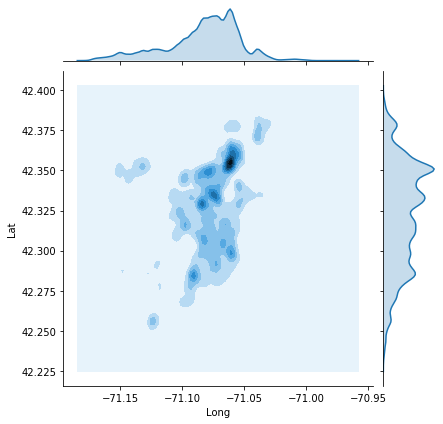

In [17]:
location_shoot = crime_code[['Lat','Long']]
location_shoot = location_shoot.dropna()

location_shoot = location_shoot.loc[(location_shoot['Lat']>40) & (location_shoot['Long'] < -60)]  

x_shoot = location_shoot['Long']
y_shoot = location_shoot['Lat']

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
#sns.jointplot(x_shoot, y_shoot, kind='scatter')
#sns.jointplot(x_shoot, y_shoot, kind='reg')
#sns.jointplot(x_shoot, y_shoot, kind='resid')
#sns.jointplot(x_shoot, y_shoot, kind='hex')
%time sns.jointplot(x_shoot, y_shoot, kind='kde')

### Feature Engeneering

Criação de features interessantes que podem ser utilizadas na interpretação de eventos e que poderão ser úteis no para o modelo. 

#### Dia e Noite

A primeira que será criada é Dia ou Noite, ou seja, a ocorrêcia se deu em durante o dia ou durante a noite.

1.Definição das variáveis como valores padrões

In [18]:
crime_code['Day'] = 0
crime_code['Night'] = 0

2.Marcação dos dados

In [19]:
# Day or night for 1st month
crime_code['Day'].loc[(crime_code['MONTH'] == 1) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 18)] = 1

# Day or night for 2st month
crime_code['Day'].loc[(crime_code['MONTH'] == 2) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 19)] = 1

# for 3st month
crime_code['Day'].loc[(crime_code['MONTH'] == 3) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 20)] = 1

# Day or night for 4st month
crime_code['Day'].loc[(crime_code['MONTH'] == 4) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 20)] = 1

# Day or night for 5st month
crime_code['Day'].loc[(crime_code['MONTH'] == 5) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 6st month
crime_code['Day'].loc[(crime_code['MONTH'] == 6) & (crime_code['HOUR'] >= 4) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 7st month
crime_code['Day'].loc[(crime_code['MONTH'] == 7) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 8st month
crime_code['Day'].loc[(crime_code['MONTH'] == 8) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 9st month
crime_code['Day'].loc[(crime_code['MONTH'] == 9) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 20)] = 1

# Day or night for 10st month
crime_code['Day'].loc[(crime_code['MONTH'] == 10) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 19)] = 1

# Day or night for 11st month
crime_code['Day'].loc[(crime_code['MONTH'] == 11) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 17)] = 1

# Day or night for 12st month
crime_code['Day'].loc[(crime_code['MONTH'] == 12) & (crime_code['HOUR'] >= 7) & (crime_code['HOUR'] <= 17)] = 1


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


3.Marcação dos dados, quando for noite marca 1.

In [20]:
crime_code['Night'].loc[crime_code['Day']==0]=1

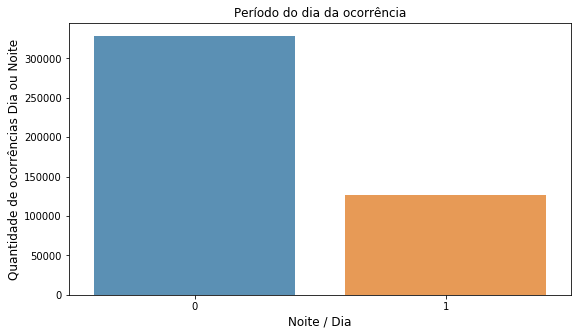

In [21]:
crime_count  = crime_code['Night'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(9,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Período do dia da ocorrência')
plt.ylabel('Quantidade de ocorrências Dia ou Noite', fontsize=12)
plt.xlabel('Noite / Dia', fontsize=12)
plt.show()

#### Feriados Nacionais

A segunda feature que será criada é Feriados (Holidays), a experiência policial afirma que grande parte das ocorrências ocorrem nos feriados. São diversas classes de eventos que podem ser classificados dos mais brandos a o mais graves. Os feriados nacionais em questão são dos Estados Unidos da Américas (USA), no Estado de Massachusetts acrescenta o Patriot's Day, dia em que ocorre a Boston Marathon.

In [22]:
cal = UnitedStates()

start = crime_code['OCCURRED_ON_DATE'].min()
start_year = start.year  # Assuming dates are Timestamp objects.
end = crime_code['OCCURRED_ON_DATE'].max()
end_year = end.year 

holidays = set(holiday[0] 
               for year in range(start_year, end_year + 1)
               for holiday in cal.holidays(year)
               if start.date() <= holiday[0] <= end.date())

crime_count['Holiday'] = crime_code['OCCURRED_ON_DATE'].isin(holidays)

### https://stackoverflow.com/questions/57403835/pandas-using-workalendar-to-check-if-a-date-is-a-holiday-and-assigning-boolean?noredirect=1&lq=1

#### Informações Climáticas

In [23]:
boston_noaa.drop(columns =["DATE"], inplace = True) 
data_noaa_boston = pd.merge(crime_code, boston_noaa, on="hash", how="left")

In [ ]:
data_noaa_boston

In [ ]:
data_noaa_boston.describe()

In [ ]:
data_noaa_boston.info()

In [ ]:
offense_codes

### Model Build

A construção e definição da arquitetura do modelo é um das fases mais importantes. É nesta etapa que definimos features mais importantes definimos algoritmos e tecnicas que farão mais sentido para o nosso case.

No nosso case temos dados que não são interessantes para nosso modelo, para isso temos algumas opções. Deletar os dados ou exttrair features que sejam interessantes. No meu caso eu prefiro tentar extrair antes de deletar, ou seja, tentar tirar algum valor.

In [24]:
# Transformando os dados em hash

data_noaa_boston['hash_1'] = data_noaa_boston['OFFENSE_CODE_GROUP'].apply(hash)
data_noaa_boston['hash_2'] = data_noaa_boston['Location'].apply(hash)
data_noaa_boston['hash_3'] = data_noaa_boston['REPORTING_AREA'].apply(hash)
data_noaa_boston['hash_4'] = data_noaa_boston['OFFENSE_DESCRIPTION'].apply(hash)
data_noaa_boston['hash_5'] = data_noaa_boston['DISTRICT'].apply(hash)
#data_noaa_boston['hash_6'] = data_noaa_boston['Lat'].apply(hash)
#data_noaa_boston['hash_7'] = data_noaa_boston['Long'].apply(hash)
data_noaa_boston['hash_8'] = data_noaa_boston['STREET'].apply(hash)
data_noaa_boston['hash_9'] = data_noaa_boston['OCCURRED_ON_DATE'].apply(hash)

In [25]:
## concat
#data_noaa_boston['concat_desc'] = data_noaa_boston['hash_1']+data_noaa_boston['hash_2']+data_noaa_boston['hash_3']+data_noaa_boston['hash_4']+data_noaa_boston['hash_5']+data_noaa_boston['hash_8']+data_noaa_boston['OCCURRED_ON_DATE']


Qual dado vou usar, bem é um pergunta difícil. Podemos usar um bolar de cristal, buzios, contas, peguntar para um vizinha fofoqueira usar alguma técnica. No meu caso, eu optei pela técnica. No meu case optei pela verificação da correlação existente entre os dados, para isso utilizo a Correlação de Pearson.

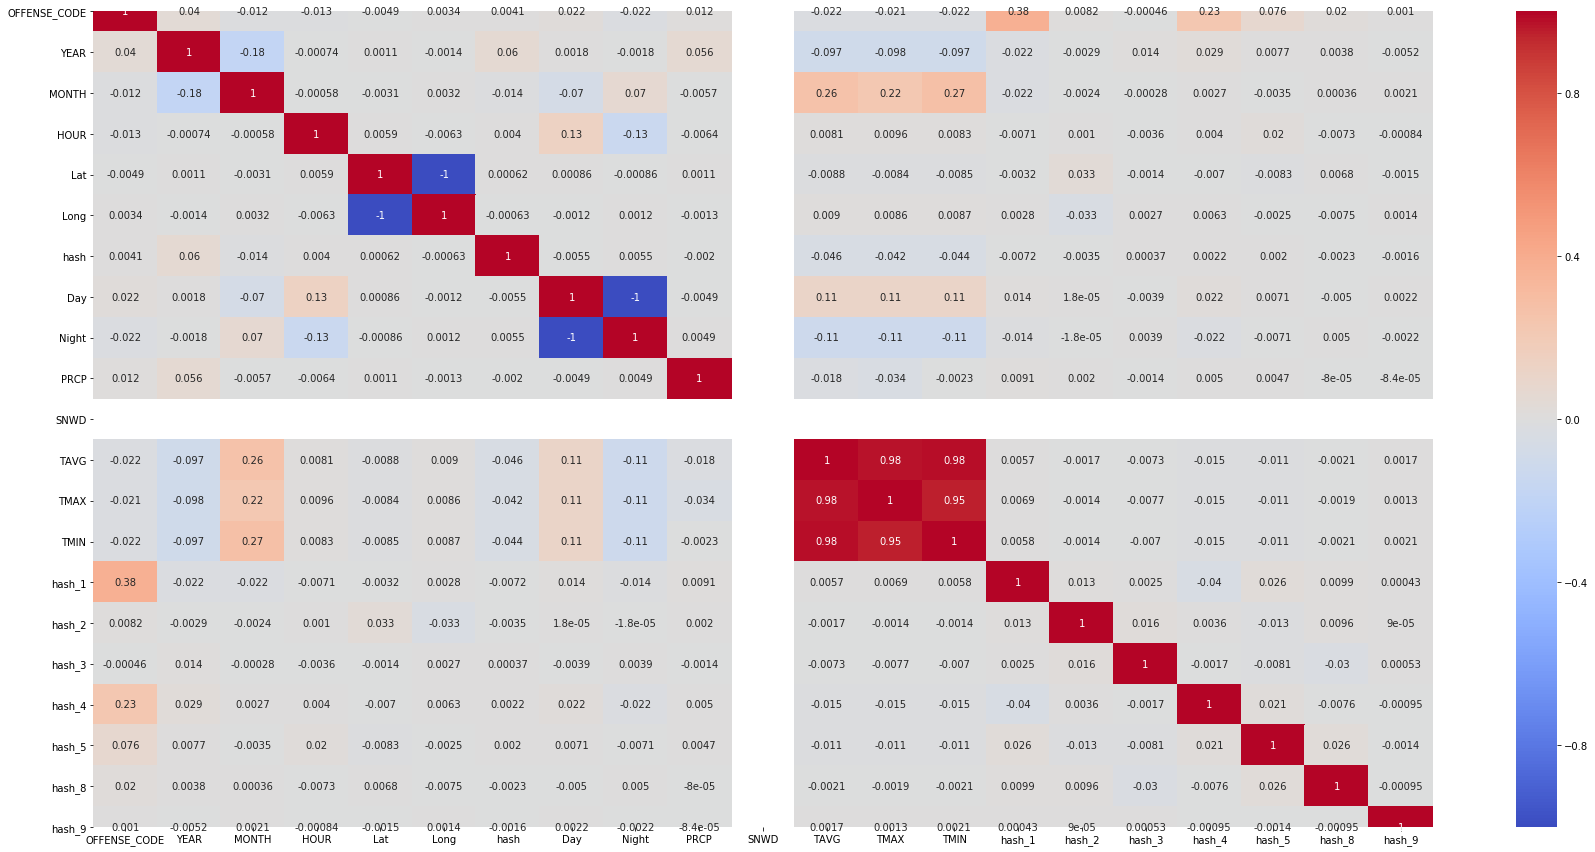

In [26]:
plt.figure(figsize=(30,15))
sns.heatmap(data_noaa_boston.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

Alguns dados fazem sentido e outros não, temos alguns dados repetidos sim mas faz parte do trabalho. O que faço agora é selecionar dados com base no gráfico acima.

In [27]:
boston_crimes_2 = data_noaa_boston[['YEAR',
                                    'MONTH',
                                    'DAY_OF_WEEK',
                                    'HOUR',
                                    'Location',
                                    'hash',
                                    'Day',
                                    'Night',
                                    'PRCP',
                                    'TAVG',
                                    'TMAX',
                                    'TMIN',
                                    'hash_1',
                                    'hash_2',
                                    'hash_3',
                                    'hash_4',
                                    'hash_5',
                                    'hash_8',
                                    'hash_9']]

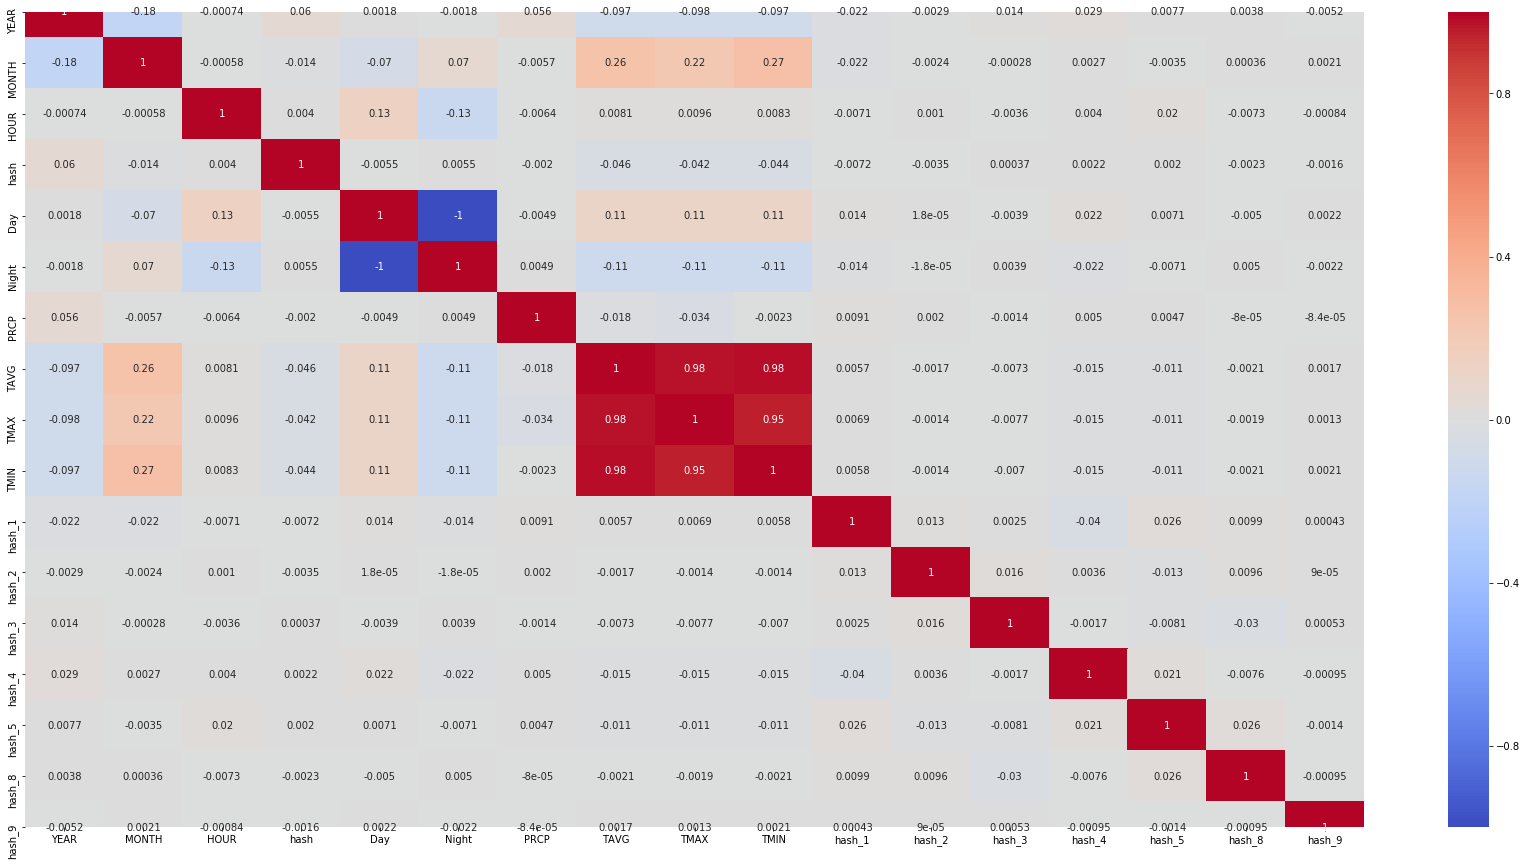

In [28]:
plt.figure(figsize=(30,15))
sns.heatmap(boston_crimes_2.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

Bem os dados acima já fazem mais sentido para o que faremos mais para frente.

In [29]:
boston_crimes_2.describe()

,YEAR,MONTH,HOUR,hash,Day,Night,PRCP,TAVG,TMAX,TMIN,hash_1,hash_2,hash_3,hash_4,hash_5,hash_8,hash_9
count,455910.000000,455910.000000,455910.000000,4.559100e+05,455910.000000,455910.000000,455910.000000,455910.000000,455910.000000,455910.000000,4.559100e+05,4.559100e+05,4.559100e+05,4.559100e+05,4.559100e+05,4.559100e+05,4.559100e+05
mean,2017.224022,6.819971,13.099491,-7.210803e+15,0.720774,0.279226,0.115542,54.668185,62.458020,47.464960,2.265628e+18,2.759998e+17,-1.391228e+17,-8.429916e+16,-1.027416e+18,5.004545e+16,-6.276226e+15
std,1.343762,3.373510,6.317138,5.255824e+18,0.448619,0.448619,0.291204,16.853266,18.084856,16.491051,5.528584e+18,5.292126e+18,5.216291e+18,5.407437e+18,5.654771e+18,5.310551e+18,5.322043e+18
min,2015.000000,1.000000,0.000000,-9.212189e+18,0.000000,0.000000,0.000000,0.000000,10.000000,-9.000000,-8.792488e+18,-9.223053e+18,-9.220502e+18,-9.215885e+18,-9.206293e+18,-9.217502e+18,-9.223353e+18
25%,2016.000000,4.000000,9.000000,-4.439780e+18,0.000000,0.000000,0.000000,40.000000,48.000000,35.000000,-2.319391e+18,-4.325626e+18,-4.485234e+18,-4.689294e+18,-5.257337e+18,-4.345266e+18,-4.606594e+18
50%,2017.000000,7.000000,14.000000,-1.096600e+17,1.000000,0.000000,0.000000,55.000000,63.000000,48.000000,3.209448e+18,4.076458e+17,2.373408e+17,4.645875e+17,-3.445598e+18,1.727383e+17,-1.673557e+16
75%,2018.000000,10.000000,18.000000,4.557421e+18,1.000000,1.000000,0.070000,70.000000,77.000000,62.000000,7.357937e+18,5.334411e+18,4.106202e+18,5.012876e+18,6.256038e+18,4.411671e+18,4.603354e+18
max,2020.000000,12.000000,23.000000,9.219521e+18,1.000000,1.000000,2.680000,90.000000,98.000000,83.000000,9.041546e+18,9.223199e+18,9.204654e+18,9.071571e+18,7.635207e+18,9.215413e+18,9.223366e+18


### Models

Para a primeira fase do trabalho de construção de um modelo de predição, o que farei é clusterizar meus dados para encontrar grupo. Para tanto utilizarei algumas técnicas como preprocessamento dos dados para padronizar, PCA (Principal Component Analysis https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Principal_Components_Analysis.pdf) e claro KMeans (https://en.wikipedia.org/wiki/K-means_clustering).

In [ ]:
# Importação das biblitecas e as classes que utilizaremos, para case
# uso skLearn que vem cheia de boas opções interessantes

from sklearn import preprocessing
## https://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.decomposition import PCA
## https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.cluster import KMeans
## https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


# Take useful feature and standardize them
data = boston_crimes_2[['hash_8','hash_9', 'MONTH', 'hash', 'PRCP', 'TAVG']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

Abaixo uso o método de elbow para escolher a quantidade de cluster que meu modelo agrupará os dados, partido de valores que vão de 1 até 20. 

In [ ]:
# calculate with different number of centroids to see the loss plot (elbow method)
# hyperparameters, algorithm https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf
# (Using the Triangle Inequality to Accelerate k-Mean)

n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i, 
                 verbose=1, 
                 algorithm="elkan",
                 n_jobs=-1).fit(data) for i in n_cluster]

scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

Com os valores plotados usando o método de elbow escolho de forma arbitrária a quantidade de cluster que utlizarei. Partido da daí o modelo fará a predição em que cluster o dados será classificado.

In [ ]:
boston_crimes_2['cluster'] = kmeans[14].predict(data)
boston_crimes_2['principal_feature1'] = data[0]
boston_crimes_2['principal_feature2'] = data[1]
boston_crimes_2['cluster'].value_counts()

Abaixo gero um gráfico para me apoiar nos próximo passos do modelo.

In [ ]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(boston_crimes_2['principal_feature1'], boston_crimes_2['principal_feature2'], c=boston_crimes_2["cluster"].apply(lambda x: colors[x]))
plt.show()

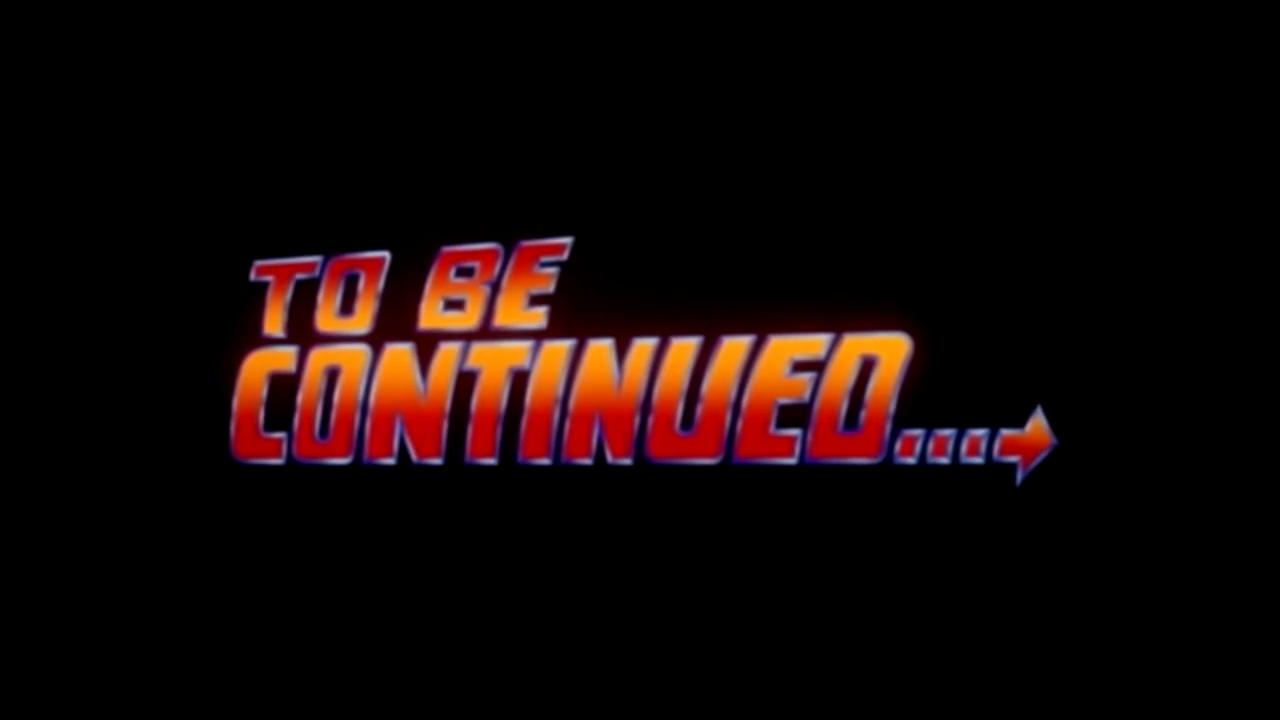

In [3]:
Image("MV5BYjlkMGIwOTktZGNkYy00ZWIwLTk5MmYtMDQzNzBhMDM5MzEyXkEyXkFqcGdeQXVyNjc1NTYwNDk@._V1_.jpg")